<a href="https://githubtocolab.com/BioWar/Satellite-Image-Segmentation-using-Deep-Learning-for-Deforestation-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Dataset Analysis

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
!pip install selenium

drive.mount("/content/gdrive")

     |████████████████████████████████| 911kB 6.4MB/s 
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
 X_name, Y_name = "X__balanced.npy", "Y__balanced.npy"
X, Y = np.load(X_name), np.load(Y_name)
print(f"[INFO] X.shape = {X.shape}, Y.shape = {Y.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'X__balanced.npy'

In [43]:
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_raw_images(y_path):
    Y = []
    for filename in os.listdir(y_path):
        if filename.endswith("png"):
            Y.append(filename)
    return Y

def load_test_images(path):
    images = load_raw_images(path)
    np_images = []
    for image in images:
        im_x = Image.open(f"{path}/{image}")
        im_x_np = np.asarray(im_x, dtype="float32") / 255.0
        np_images.append(im_x_np)
    return np_images

def count_pixels(image):
    red, green, blue = (226, 19, 15), (11, 195, 72), (51, 15, 200)
    colors = {"red": 0, "green": 0, "blue": 0}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i][j]
            pixel = np.round(pixel*255).astype('int32')
            if (pixel == red).all():
                colors["red"] += 1
            elif (pixel == blue).all():
                colors["blue"] += 1
            elif (pixel == green).all():
                colors["green"] += 1
    return colors

def get_pixel_data(Y):
    quantity = Y.shape[0]
    print(f"[INFO] Get pixels from {quantity} images.")
    colors_global = {"red": 0, "green": 0, "blue": 0}
    df = pd.DataFrame(data=np.zeros((quantity, 3)), columns=['red', 'green', 'blue'])
    for i, image in enumerate(Y):
        print(f"[INFO] Image {i+1}/{quantity}")
        colors = count_pixels(image)
        for color, value in colors.items():
            colors_global[color] += value
            df.loc[i][color] = value
    print("[INFO] Count complete.")
    return colors_global, df

def get_dataset_metadata(X, Y):
    size = X.shape[0]
    height, width = X.shape[1:3]
    channels = X.shape[3]
    parameters = {"size": size,
                  "height": height,
                  "width": width,
                  "channels": channels}
    for parameter, value in parameters.items():
        print(f"[INFO] {parameter} => {value}")

def display(X, Y, name):
    fig, ax = plt.subplots(ncols=2,
                           nrows=X.shape[0],
                           figsize=(X.shape[0]*5, X.shape[0]*8),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    for i, im in enumerate(X):
        df_ax.iloc[i][0].imshow(im)
        df_ax.iloc[i][0].set_xticklabels([])
        df_ax.iloc[i][0].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][0].set_title(f'Satellite Images 512x512 pixels', fontsize=20)
    for i, im in enumerate(Y):
        df_ax.iloc[i][1].imshow(im)
        df_ax.iloc[i][1].set_xticklabels([])
        df_ax.iloc[i][1].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][1].set_title(f'RGB Segmentation Mask', fontsize=20)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()

In [29]:
Y = load_test_images("/content/gdrive/MyDrive/data_shaffled_8_04_2021-20240716T080625Z-001/data_shaffled_8_04_2021/images")
X = load_test_images("/content/gdrive/MyDrive/data_shaffled_8_04_2021-20240716T080625Z-001/data_shaffled_8_04_2021/images")

In [45]:
Y_np = np.array(Y)
X_np = np.array(X)

In [46]:
Y_np.shape

(326, 512, 512, 3)

In [11]:
colors, df = get_pixel_data(Y_np[:])

[INFO] Get pixels from 240 images.
[INFO] Image 1/240
[INFO] Image 2/240
[INFO] Image 3/240
[INFO] Image 4/240
[INFO] Image 5/240
[INFO] Image 6/240
[INFO] Image 7/240
[INFO] Image 8/240
[INFO] Image 9/240
[INFO] Image 10/240
[INFO] Image 11/240
[INFO] Image 12/240
[INFO] Image 13/240
[INFO] Image 14/240
[INFO] Image 15/240
[INFO] Image 16/240
[INFO] Image 17/240
[INFO] Image 18/240
[INFO] Image 19/240
[INFO] Image 20/240
[INFO] Image 21/240
[INFO] Image 22/240
[INFO] Image 23/240
[INFO] Image 24/240
[INFO] Image 25/240
[INFO] Image 26/240
[INFO] Image 27/240
[INFO] Image 28/240
[INFO] Image 29/240
[INFO] Image 30/240
[INFO] Image 31/240
[INFO] Image 32/240
[INFO] Image 33/240
[INFO] Image 34/240
[INFO] Image 35/240
[INFO] Image 36/240
[INFO] Image 37/240
[INFO] Image 38/240
[INFO] Image 39/240
[INFO] Image 40/240
[INFO] Image 41/240
[INFO] Image 42/240
[INFO] Image 43/240
[INFO] Image 44/240
[INFO] Image 45/240
[INFO] Image 46/240
[INFO] Image 47/240
[INFO] Image 48/240
[INFO] Image 4

In [20]:
#colors, df = get_pixel_data(Y[:])
{'blue': 9762135, 'green': 65196659, 'red': 9451534}
colors, df

({'red': 7004797, 'green': 48097405, 'blue': 7812342},
           red     green     blue
 0    160177.0   89496.0  12471.0
 1         0.0  260699.0   1445.0
 2         0.0  262144.0      0.0
 3     43016.0  217613.0   1515.0
 4         0.0  262144.0      0.0
 ..        ...       ...      ...
 235   32132.0  223512.0   6499.0
 236    6131.0  256013.0      0.0
 237   34624.0  220298.0   7222.0
 238       0.0  262144.0      0.0
 239   28186.0  233958.0      0.0
 
 [240 rows x 3 columns])

In [21]:
s = 0
for k, v in colors.items():
  s += v
s - 322*512*512

-21495824

In [31]:
df.to_csv("/content/gdrive/MyDrive/data_shaffled_8_04_2021-20240716T080625Z-001/dataframe_322.csv")

In [35]:
# df.to_csv("dataframe_144.csv")
df = pd.read_csv("dataframe_322.csv")
df = df.loc[:][['red', 'green', 'blue']]
df

red     green     blue
0    160177.0   89496.0  12471.0
1         0.0  260699.0   1445.0
2         0.0  262144.0      0.0
3     43016.0  217613.0   1515.0
4         0.0  262144.0      0.0
..        ...       ...      ...
235   32132.0  223512.0   6499.0
236    6131.0  256013.0      0.0
237   34624.0  220298.0   7222.0
238       0.0  262144.0      0.0
239   28186.0  233958.0      0.0

[240 rows x 3 columns]

In [48]:
#colors          = {'red': 3878379, 'green': 32288939, 'blue': 1581227}
colors_balanced = {'red': 5412925, 'green': 34175495, 'blue': 3140800}
get_dataset_metadata(X, Y), colors_balanced

AttributeError: 'list' object has no attribute 'shape'

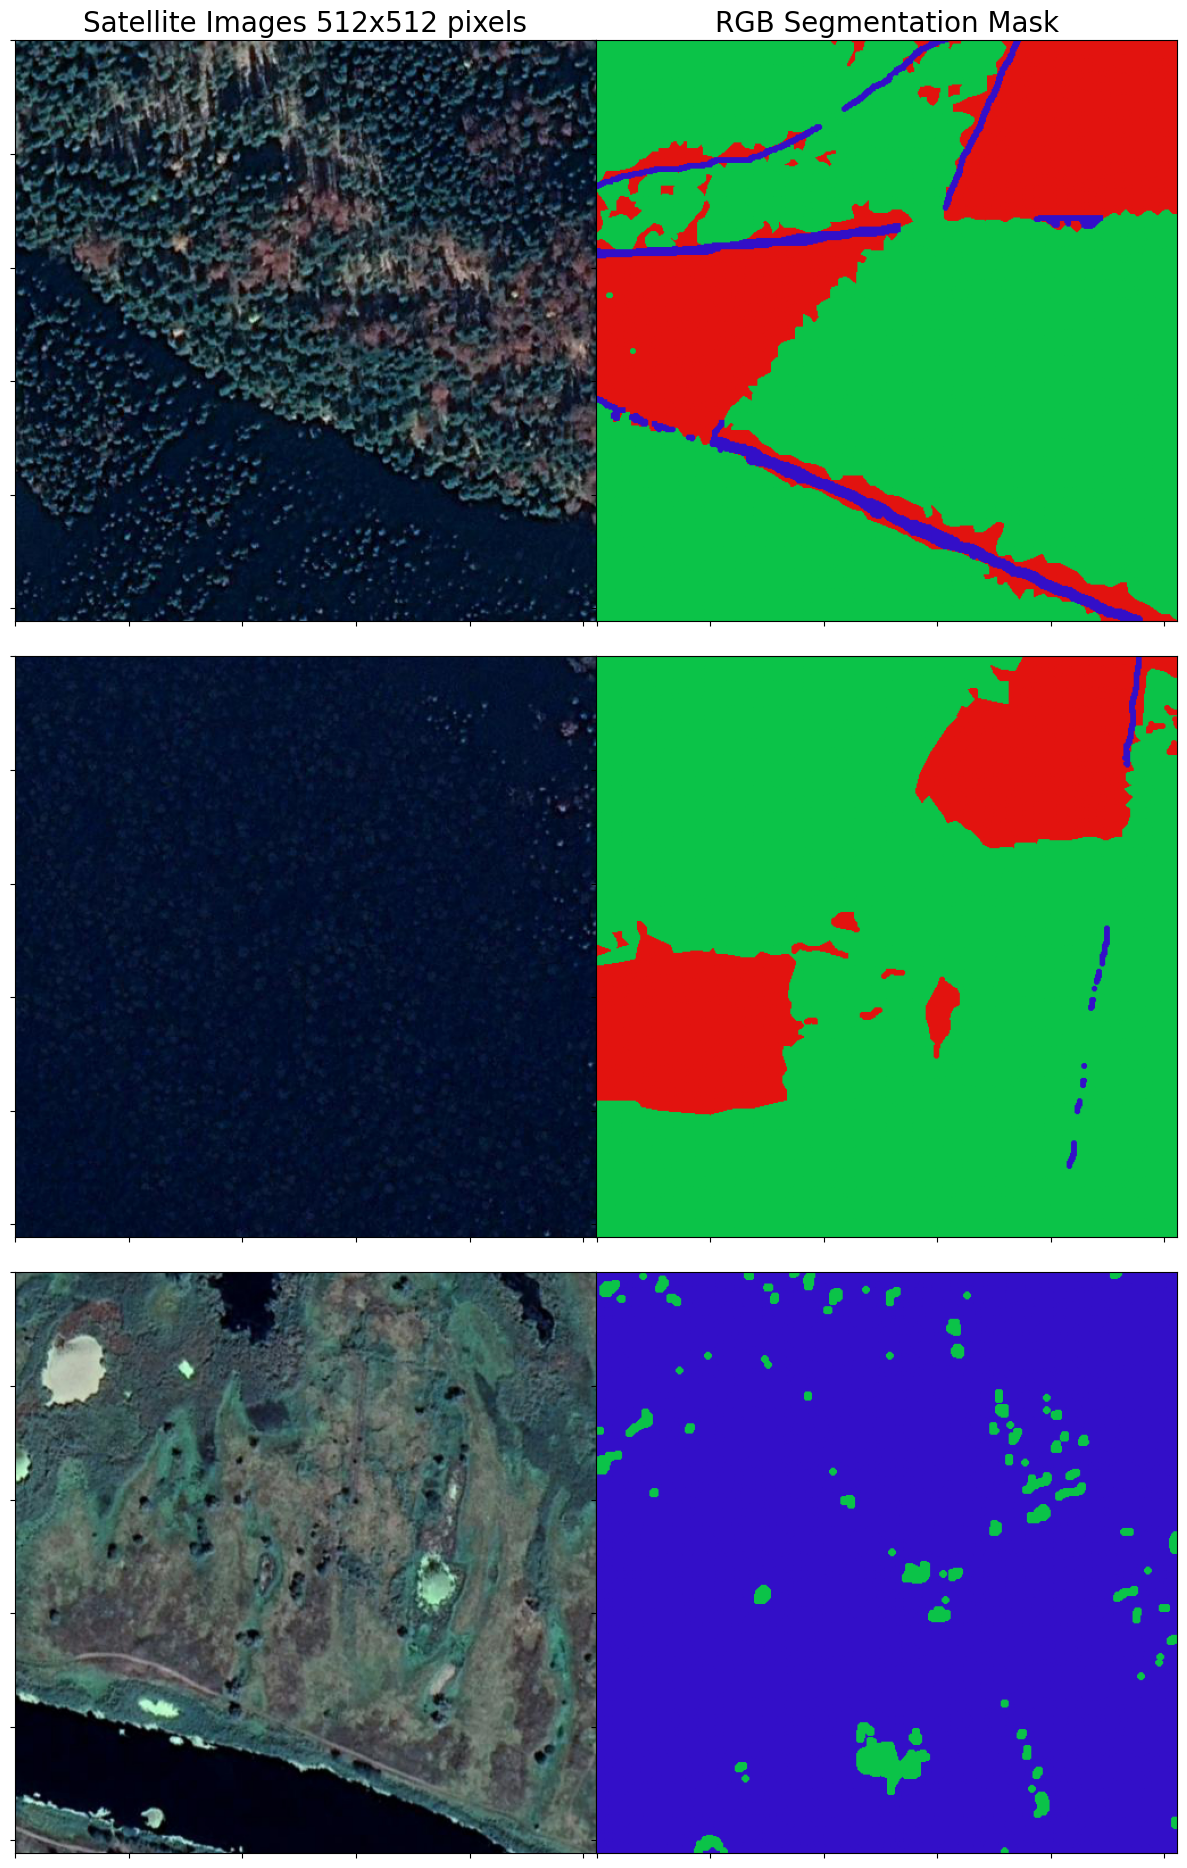

In [18]:
start = 58
display(X_np[start:start+3], Y_np[start:start+3], name="Images_and_masks.png")

In [37]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from bokeh.resources import INLINE
from bokeh.io import export_png

output_notebook(resources=INLINE)

#output_file("colormapped_bars.html")

fruits = ['Forest', 'Deforestation', 'Other']
counts = [colors['green'], colors['red'], colors['blue']]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=['green', 'red', 'blue']))
# y_range = [10 ** 0, 10 ** 3]
# y_range=(0, colors['green']+100000)
p = figure(x_range=fruits, y_range = [10 ** 0, 10 ** 9], plot_height=550, plot_width=850, title="Classes Distribution (log scale)",
           toolbar_location=None, tools="", y_axis_type="log")

p.vbar(x='fruits', top='counts', width=0.8, color='color', legend_field="fruits", source=source, bottom=0.1)

p.xgrid.grid_line_color = None
p.title.text_font_size = '20pt'
p.legend.label_text_font_size  = '16pt'
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
# export_png(p, filename="/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/Data_distribution_log.png")
show(p)

AttributeError: unexpected attribute 'plot_height' to figure, similar attributes are outer_height, height or min_height

In [38]:
def display_with_masks(X, Y, name, alpha=0.45):
    fig, ax = plt.subplots(ncols=X.shape[0]//2,
                           nrows=2,
                           figsize=(X.shape[0]*5, X.shape[0]*5),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    counter = 0
    for j in range(2):
        for i in range(X.shape[0]//2):
            if i+j == 0:
                df_ax.iloc[i][j].set_title(f"Images merged with masks (alpha={alpha})", fontsize=20)
            im = X[counter] + Y[counter] * alpha
            df_ax.iloc[j][i].imshow(im)
            df_ax.iloc[j][i].set_xticklabels([])
            df_ax.iloc[j][i].set_yticklabels([])
            counter += 1

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()

In [39]:
display_with_masks(X[:4], Y[:4], name="Images_merged_masks.png")

AttributeError: 'list' object has no attribute 'shape'

IndexError: list index out of range

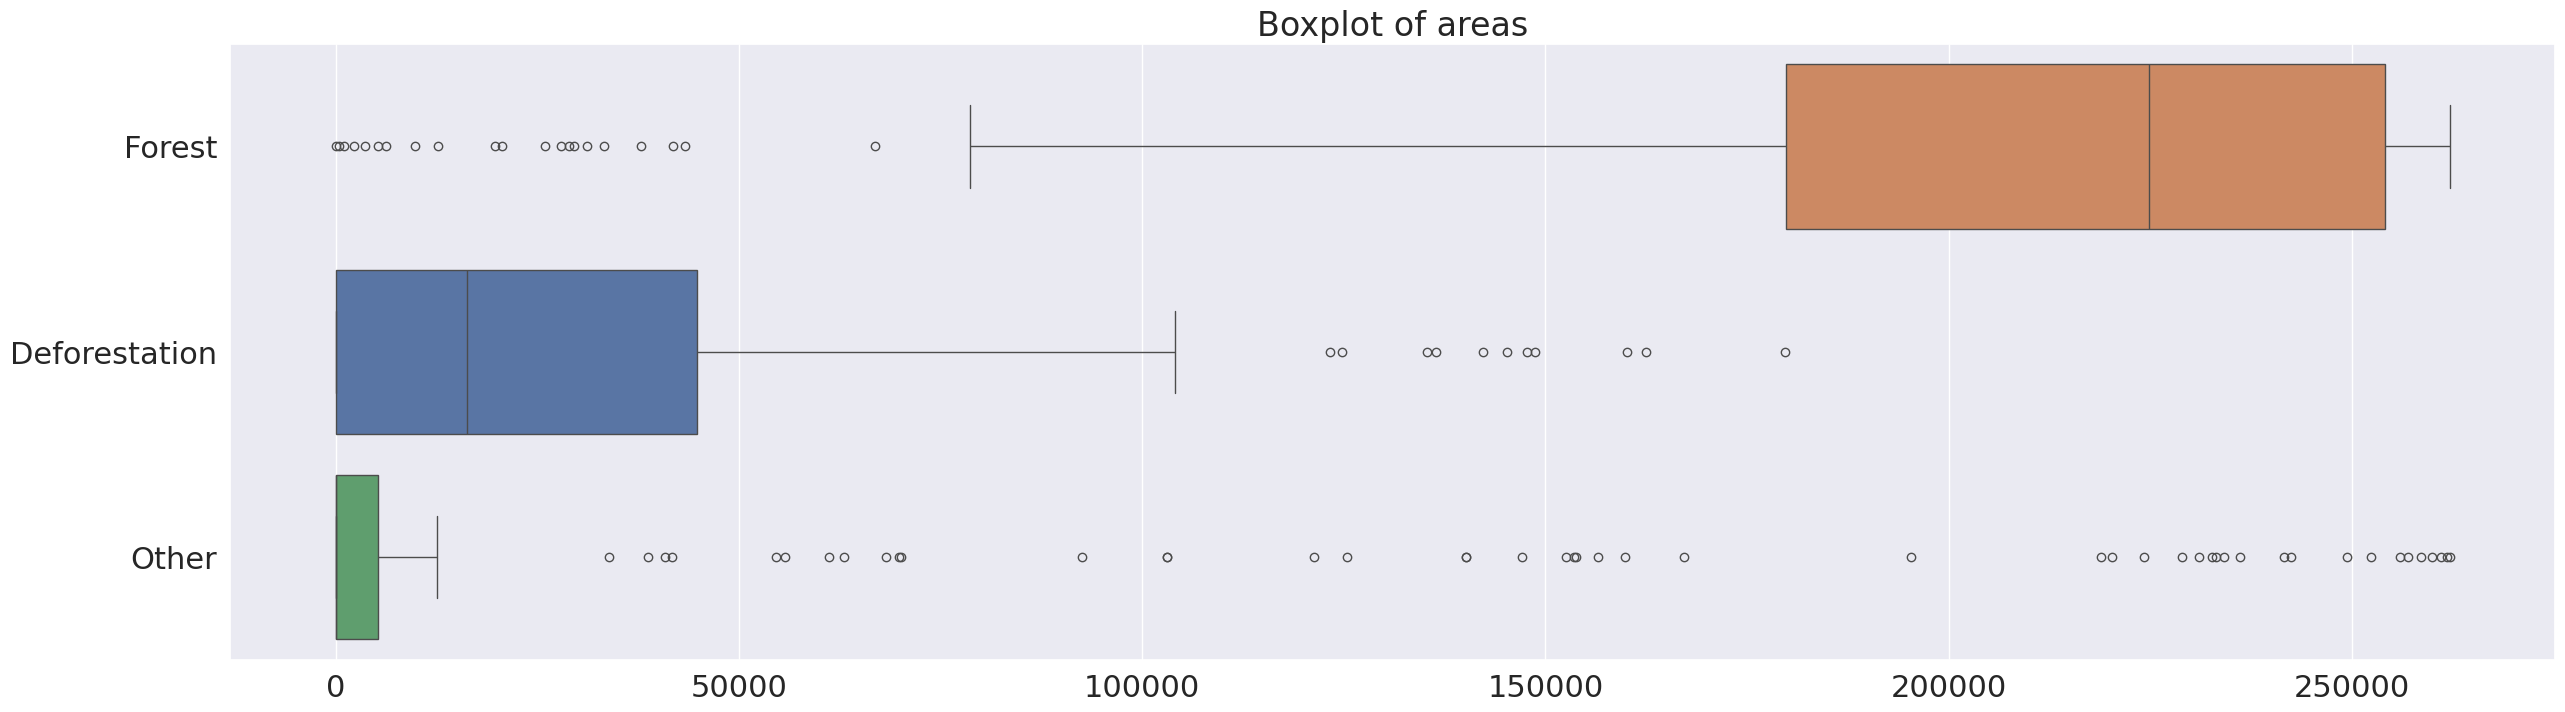

In [40]:
import seaborn as sns

sns.set(font_scale=2)
plt.figure(figsize=(30, 8))
plt.title("Boxplot of areas")
sns.set_theme(style="whitegrid")
df.columns = ["Deforestation", "Forest", "Other"]
box = sns.boxplot(data=df, orient='h', order=["Forest", "Deforestation", "Other"])

forest_box = box.artists[0]
forest_box.set_facecolor('green')
forest_box.set_label("Forest")
deforest_box = box.artists[1]
deforest_box.set_facecolor('red')
other_box = box.artists[2]
other_box.set_facecolor('blue')

box.set_xscale("log")
plt.savefig("/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/Whiskers_area_distribution.png")
plt.show()

IndexError: list index out of range

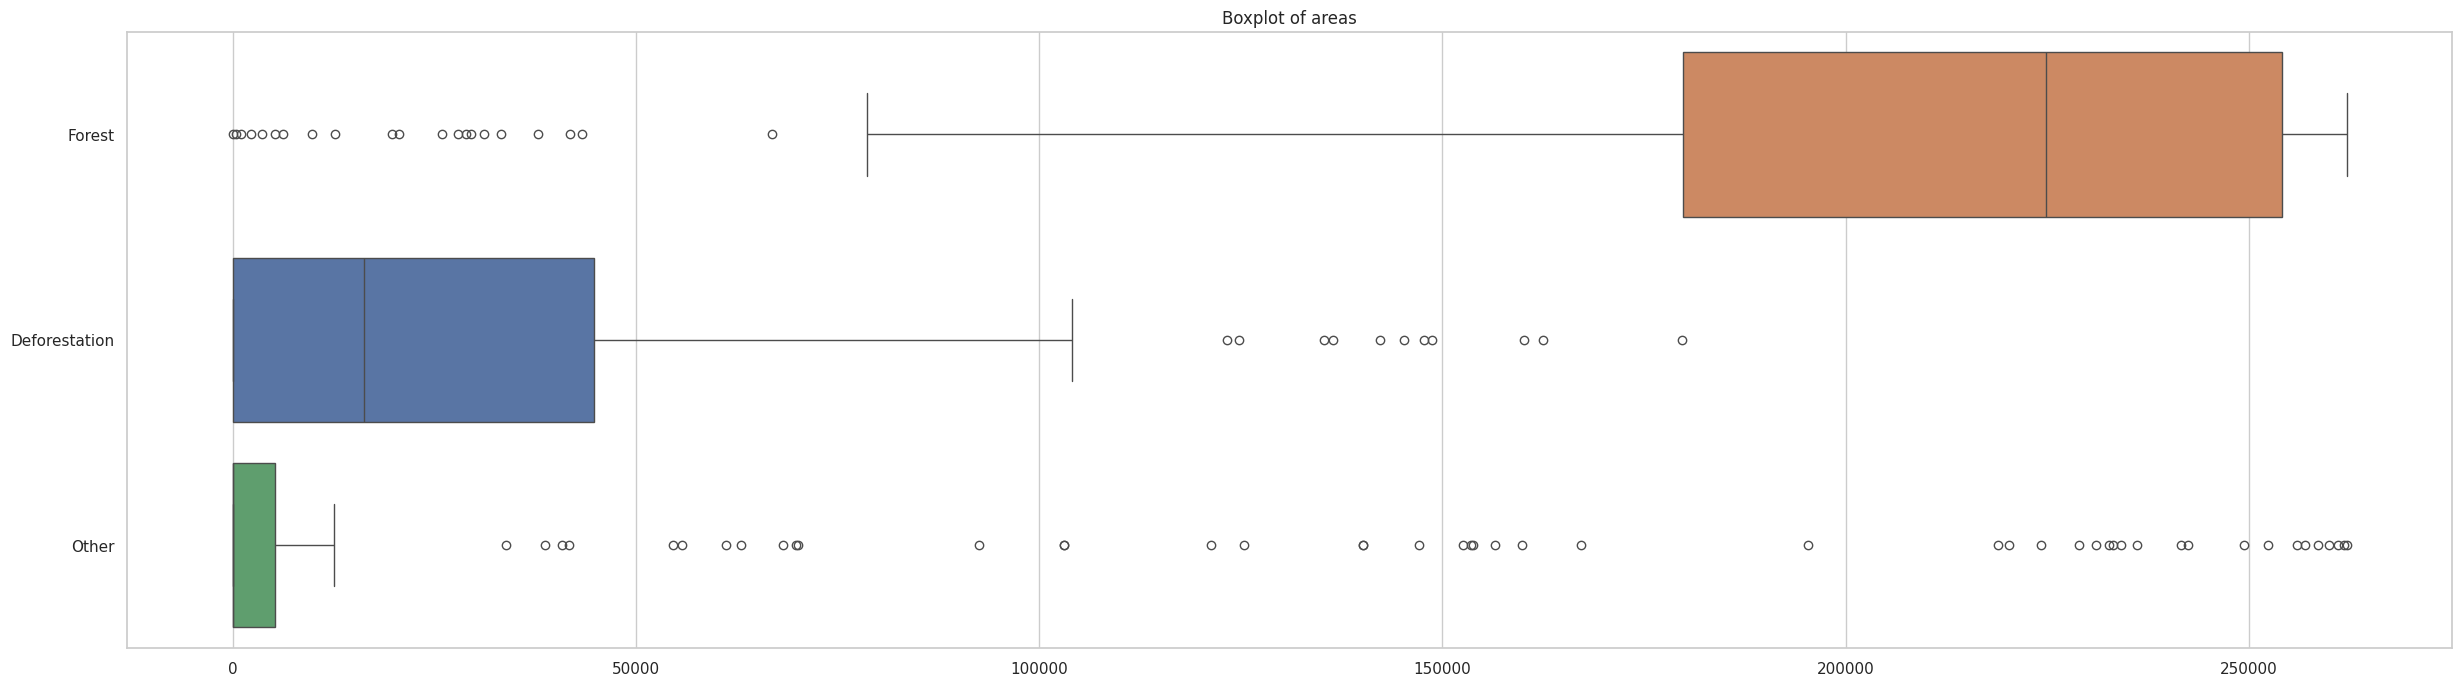

In [41]:
import seaborn as sns
import matplotlib as mpl

font = {'size'   : 22}
mpl.rc('font', **font)

plt.figure(figsize=(30, 8))
plt.title("Boxplot of areas")
sns.set_theme(style="whitegrid")
df.columns = ["Deforestation", "Forest", "Other"]
box = sns.boxplot(data=df, orient='h', order=["Forest", "Deforestation", "Other"])

forest_box = box.artists[0]
forest_box.set_facecolor('green')
forest_box.set_label("Forest")
deforest_box = box.artists[1]
deforest_box.set_facecolor('red')
other_box = box.artists[2]
other_box.set_facecolor('blue')

box.set_xscale("log")
plt.savefig("Whiskers_area_distribution.png")
plt.show()

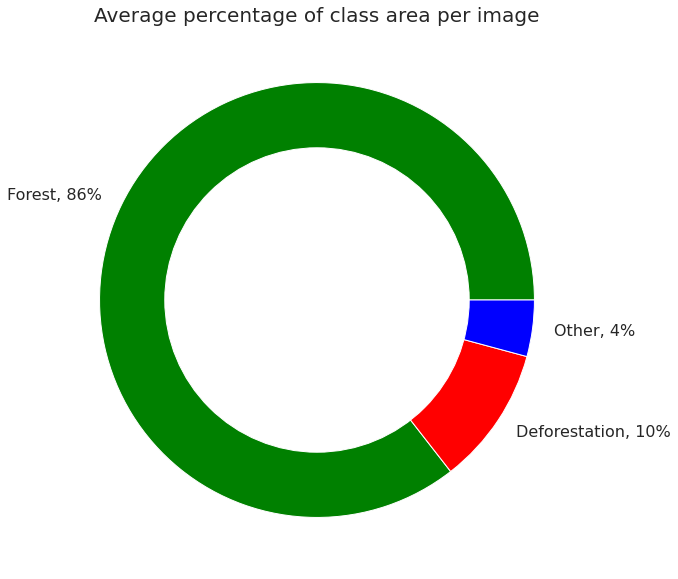

In [ ]:
size=[df["Forest"].sum()//df.shape[0], df["Deforestation"].sum()//df.shape[0], df["Other"].sum()//df.shape[0]]
my_sum = sum(size)
percents = [str(round((i/my_sum)*100))+"%" for i in size]
names=[f"Forest, {percents[0]}", f"Deforestation, {percents[1]}", f"Other, {percents[2]}"]

plt.figure(figsize=(12, 10))
# Create a circle for the center of the plot
my_circle=plt.Circle((0,0), 0.7, color='white')

# Custom colors --> colors will cycle
plt.title("Average percentage of class area per image", fontsize = 20)
plt.pie(size, labels=names, colors=['green','red','blue'], textprops={'fontsize': 16})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("Average_percentage_of_class_area_per_image.png")
plt.show()

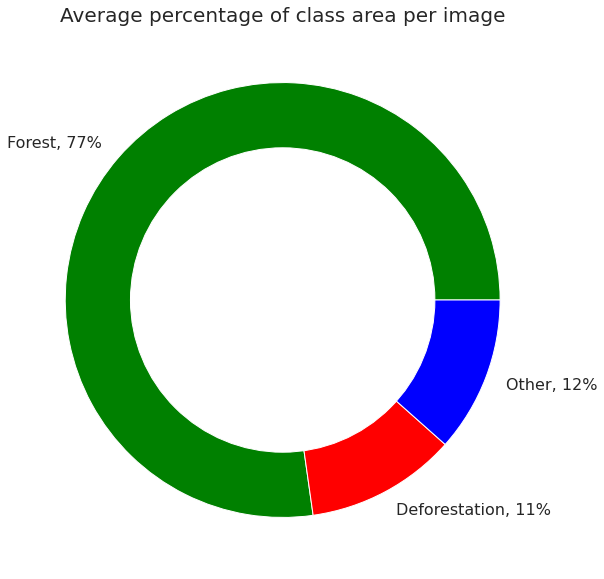

In [ ]:
size=[df["Forest"].sum()//df.shape[0], df["Deforestation"].sum()//df.shape[0], df["Other"].sum()//df.shape[0]]
my_sum = sum(size)
percents = [str(round((i/my_sum)*100))+"%" for i in size]
names=[f"Forest, {percents[0]}", f"Deforestation, {percents[1]}", f"Other, {percents[2]}"]

plt.figure(figsize=(12, 10))
# Create a circle for the center of the plot
my_circle=plt.Circle((0,0), 0.7, color='white')

# Custom colors --> colors will cycle
plt.title("Average percentage of class area per image", fontsize = 20)
plt.pie(size, labels=names, colors=['green','red','blue'], textprops={'fontsize': 16})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/Average_percentage_of_class_area_per_image.png")
plt.show()

# Model analysis

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)

import matplotlib.pyplot as plt
import numpy as np
from numba import cuda
import datetime
import pandas as pd
import seaborn as sns

In [ ]:
# model_categorical = tf.keras.models.load_model("model_nd_145_v1.h5")

In [ ]:
# summary_str = model_final.summary()

In [ ]:
# import json

# config_json_dict = model_final.get_config()
# config_json_dict
# config_json = json.dumps(config_json_dict)
# df_config = pd.read_json(config_json)
# df_config
# config_json
# df_res.iloc[-1][-1]
# df_res['Rolling']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    0.890975
996    0.890787
997    0.890135
998    0.890123
999    0.890406
Name: Rolling, Length: 1000, dtype: float64

In [ ]:
df_res = pd.read_csv("/content/gdrive/MyDrive/Metrics/model_tpu_2048_16_v5/results_model_tpu_2048_16_v5.csv")
df_res = df_res.reset_index(drop=True)
df_res['Rolling_F1_Score'] = df_res['test_f1score'].rolling(100).mean()
df_res['Rolling_IoU'] = df_res['test_iou'].rolling(100).mean()
# df_res.fillna(0, inplace=True)
columns = df_res.columns
# df_res = df_res.reindex(columns=columns)
df_res

epoch  test_f1score  test_iou  ...  train_loss  Rolling_F1_Score  Rolling_IoU
0         1      0.307569  0.227158  ...    1.966991               NaN          NaN
1         2      0.344043  0.266963  ...    1.954319               NaN          NaN
2         3      0.389884  0.316639  ...    1.940465               NaN          NaN
3         4      0.409509  0.331418  ...    1.925718               NaN          NaN
4         5      0.426053  0.349108  ...    1.906831               NaN          NaN
...     ...           ...       ...  ...         ...               ...          ...
4276    565      0.716506  0.656430  ...    1.444654          0.699741     0.644992
4277    566      0.680056  0.620725  ...    1.444654          0.700061     0.645274
4278    567      0.683206  0.631272  ...    1.444653          0.700174     0.645418
4279    568      0.709988  0.650277  ...    1.444653          0.700344     0.645533
4280    569      0.691299  0.638437  ...    1.444653          0.700086     0.645282

[4281 rows x 8 columns]

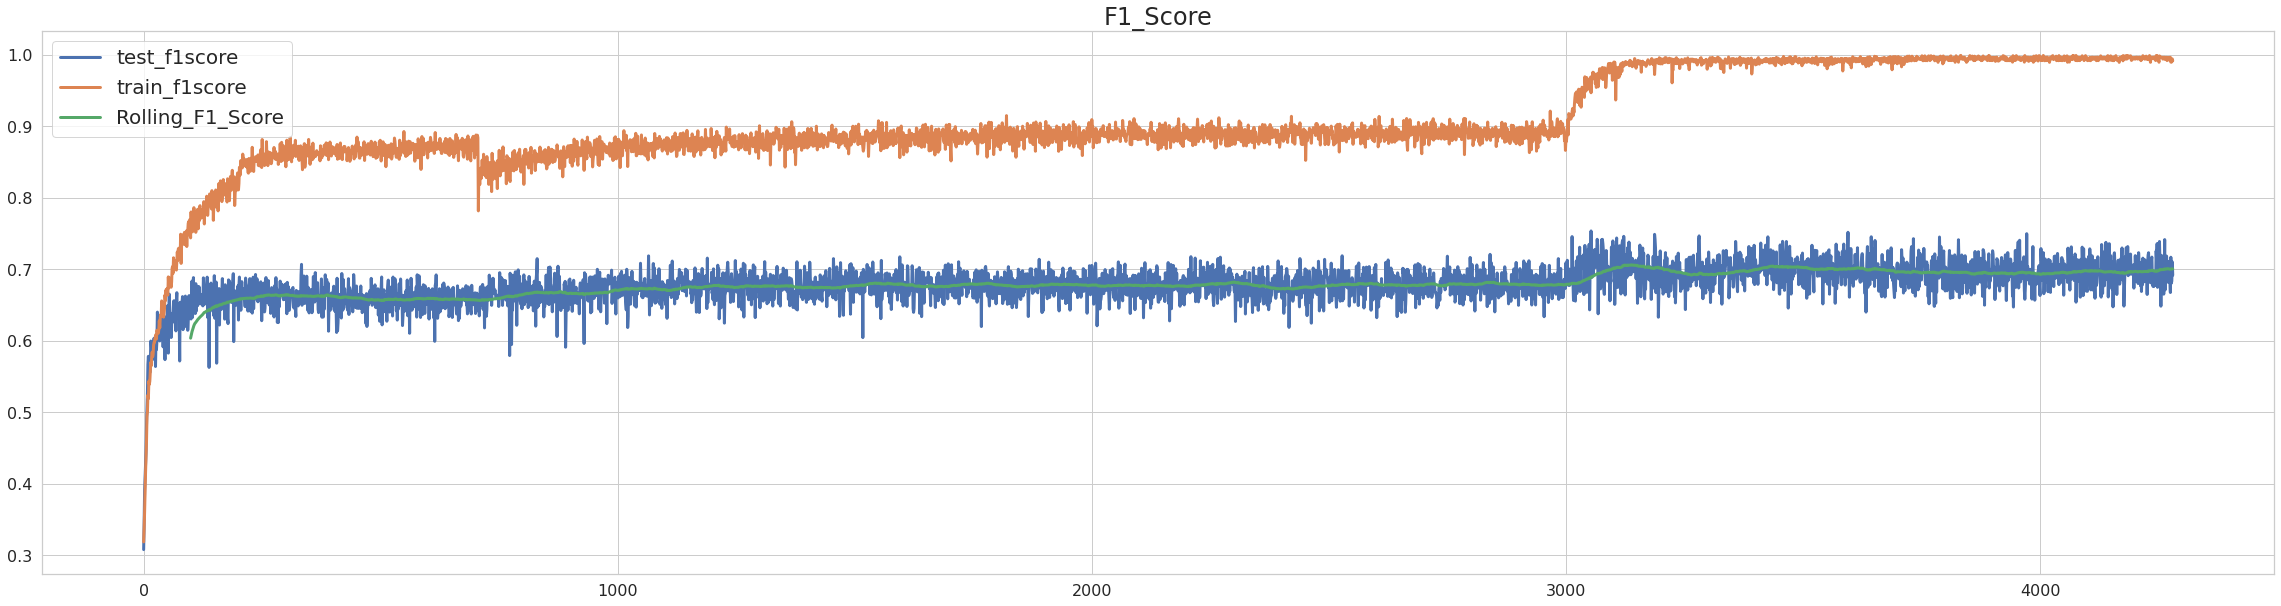

0.7000858879089349

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['test_f1score', 'train_f1score', 'Rolling_F1_Score'], ax=ax, grid=True, linewidth=3)
ax.set_title("F1_Score", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/F1_score_v5.png")
plt.show()
df_res.iloc[-1][-1]

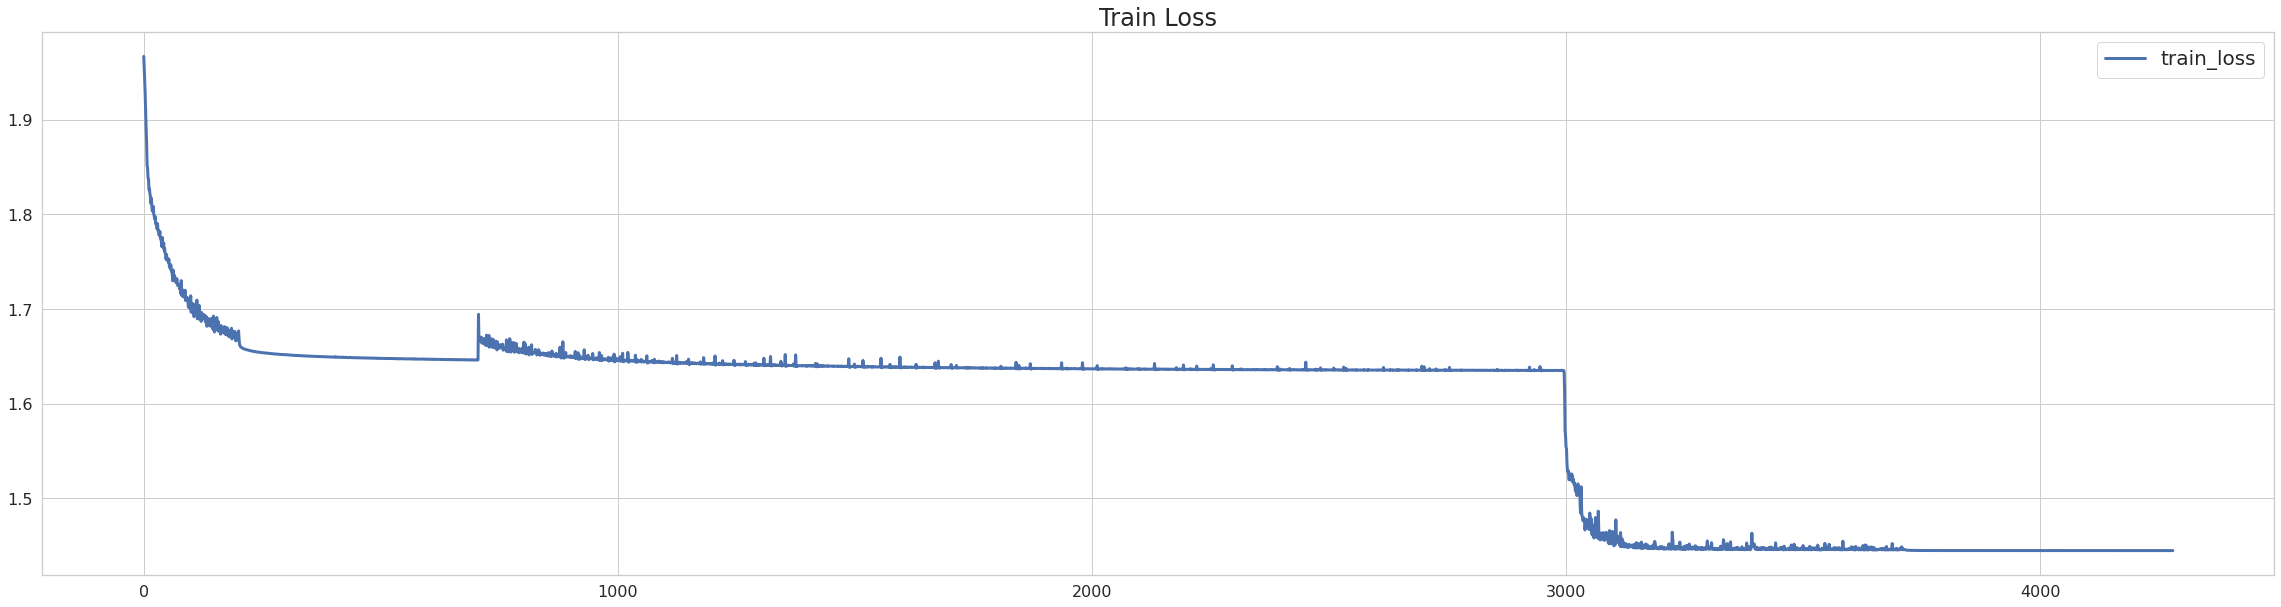

0.7000858879089349

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['train_loss'], ax=ax, grid=True, linewidth=3)
ax.set_title("Train Loss", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/Train_loss_v5.png")
plt.show()
df_res.iloc[-1][-1]

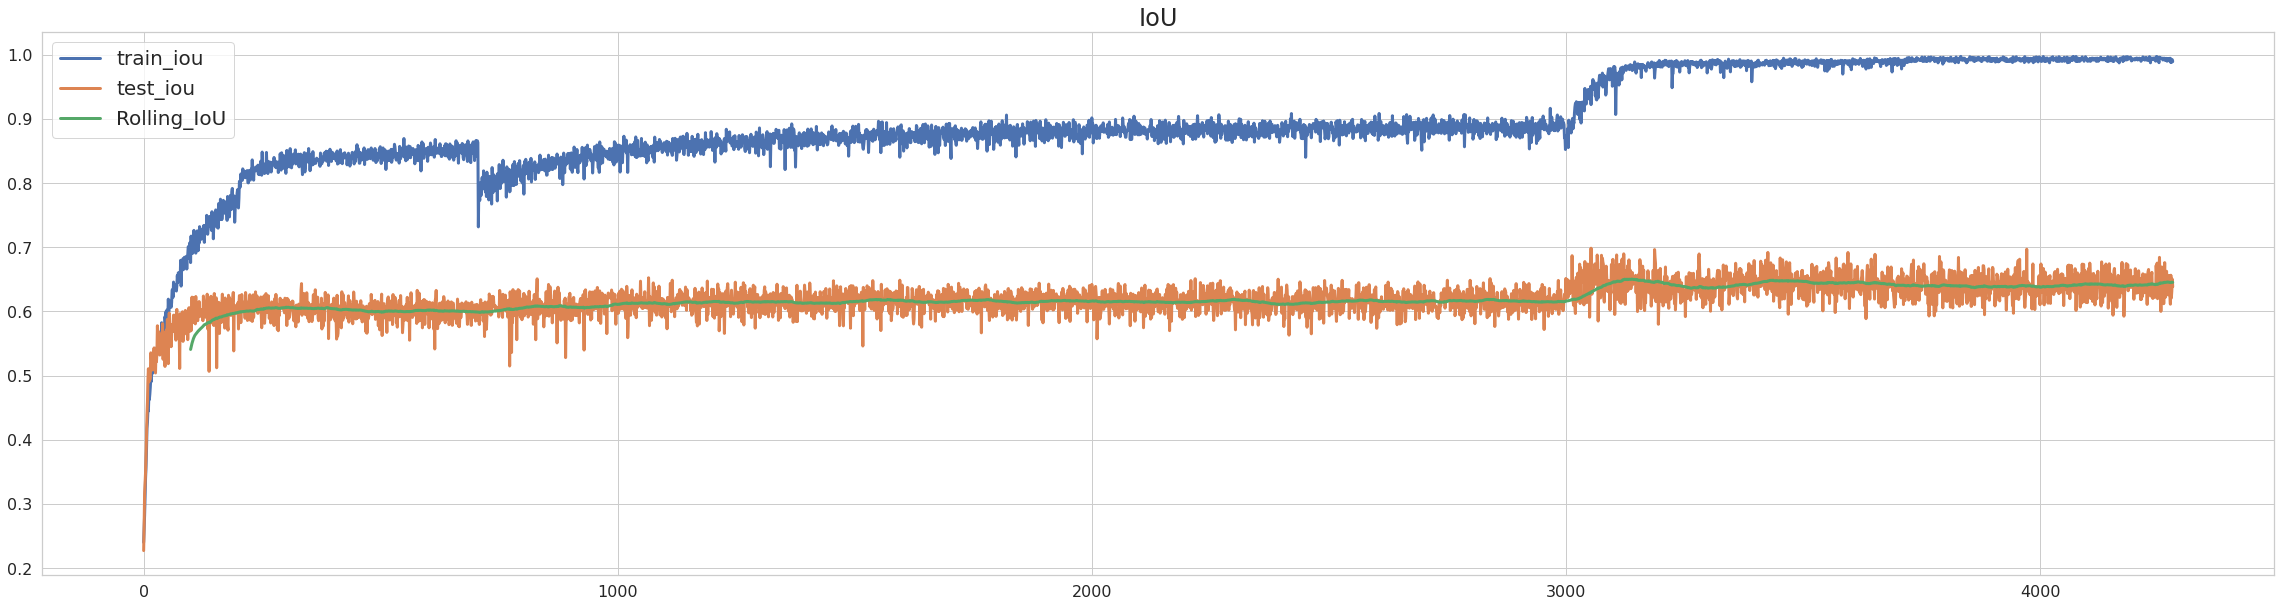

0.6452823058764161

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['train_iou', 'test_iou', 'Rolling_IoU'], ax=ax, grid=True, linewidth=3)
ax.set_title("IoU", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/IoU_v5.png")
plt.show()
df_res.iloc[-1][-1]

In [ ]:
df_categorical = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_categorical_crossentropy_v1_u1.csv", index_col="epoch")
df_dice = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_dice_coef_multilabel_v1_u1.csv", index_col="epoch")
df_tversky = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_Tvesky_v1_u1.csv", index_col="epoch")
df_hybrid = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v1_u1.csv", index_col="epoch")
df_hybrid1 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v1_u1.csv", index_col="epoch")
df_hybrid2 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v2_u1.csv", index_col="epoch")
df_hybrid3 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v3_u1.csv", index_col="epoch")
df_hybrid4 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v4_u1.csv", index_col="epoch")
df_w = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_v1_u1.csv", index_col="epoch")
df_w2 = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_v1_u2.csv", index_col="epoch")
df_wb1 = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_balanced_v1_u1.csv", index_col="epoch")


dfs = [df_wb1.drop(['f1_m', 'val_f1_m'], axis=1), df_w2, df_hybrid4]
df_concat = pd.concat(dfs, axis=1)
# df_wb1.loc[:, df_wb1.columns not in ['f1_m', 'val_f1_m']]
# df_wb1.drop(['f1_m', 'val_f1_m'], axis=1)
df_concat

accuracy       iou      loss  val_accuracy   val_iou  val_loss  \
epoch                                                                   
0      0.787091  0.462475  4.536843      0.868148  0.420340  4.417105   
1      0.787044  0.550900  4.150042      0.882452  0.589903  3.562277   
2      0.814887  0.674838  3.682003      0.894820  0.797954  3.982601   
3      0.841097  0.735418  3.392454      0.886349  0.773403  2.802176   
4      0.844615  0.764503  3.145340      0.920882  0.844133  3.189063   
...         ...       ...       ...           ...       ...       ...   
95     0.911518  0.847505  2.451700      0.918084  0.852755  2.560570   
96     0.921612  0.860642  2.501858      0.879995  0.790307  2.594877   
97     0.903603  0.837395  2.579742      0.944229  0.895604  2.267265   
98     0.895903  0.836779  2.555722      0.938733  0.885727  2.276137   
99     0.866698  0.794911  2.672536      0.931303  0.876268  2.481014   

       accuracy       iou      loss  val_accuracy   val_iou  val_loss  \
epoch                                                                   
0      0.908661  0.849840  2.814149      0.916251  0.846250  2.392998   
1      0.908214  0.852895  2.697786      0.927786  0.866824  2.073326   
2      0.913868  0.852376  2.853147      0.915779  0.846396  2.330149   
3      0.898132  0.839623  2.811135      0.919970  0.851828  2.493103   
4      0.906096  0.844670  2.700230      0.907830  0.831401  2.224400   
...         ...       ...       ...           ...       ...       ...   
95     0.951450  0.909179  2.194925      0.934284  0.877764  1.995089   
96     0.957349  0.920641  2.114754      0.926493  0.864560  1.555090   
97     0.951373  0.910310  2.381888      0.936255  0.881334  1.632564   
98     0.952245  0.911285  2.196662      0.938002  0.884114  1.662935   
99     0.953728  0.914042  2.192008      0.919400  0.851340  1.820287   

       accuracy       iou      loss  val_accuracy   val_iou  val_loss  
epoch                                                                  
0      0.851514  0.620362  4.342463      0.864582  0.732023  4.205817  
1      0.856998  0.750524  4.209329      0.843840  0.699006  4.218680  
2      0.869117  0.738691  3.827492      0.906599  0.811308  3.295348  
3      0.889337  0.805596  3.274050      0.912606  0.826270  3.229065  
4      0.906326  0.838503  3.144626      0.924050  0.852637  2.839940  
...         ...       ...       ...           ...       ...       ...  
95     0.946285  0.901253  2.487362      0.919883  0.852196  2.149909  
96     0.946737  0.901340  2.353761      0.870016  0.774437  2.263529  
97     0.947831  0.902444  2.341884      0.889635  0.802440  2.296546  
98     0.950119  0.906841  2.379557      0.932806  0.874820  1.762353  
99     0.947535  0.902987  2.432252      0.926190  0.862835  2.005191  

[100 rows x 18 columns]

In [ ]:
def plot_csv(dfs, names, metrics, savename):
    ncols = 1
    columns = dfs[0].columns
    print(f"[INFO] Available columns ({len(columns)}): {columns}.\n")
    nrows = len(columns)//2
    fig, ax = plt.subplots(ncols=ncols,
                           nrows=nrows,
                           figsize=(30, 30),
                           #sharex=True
                          )
    df_concat = pd.concat(dfs, axis=1)
    columns_new = []
    columns_grouped = []

    for name in names:
        for metric in dfs[0].columns:
            columns_new.append(f"{metric}_{name.title()}")

    for i, metric in enumerate(metrics):
        metric_columns = [metric, 'val_' + metric]
        metric_columns = metric_columns * len(dfs)
        new_labels = [label + "_" + ending.title() for label, ending in zip(metric_columns, names * len(dfs))]
        columns_grouped.append(new_labels)

    print(f"[INFO] Possible columns ({len(columns_new)}): {columns_new}.\n")
    print(f"[INFO] Columns grouped ({len(columns_grouped)}): {columns_grouped}.\n")

    df_concat.columns = columns_new
    print(f"[INFO] New columns ({len(df_concat.columns)}): {df_concat.columns}\n")
    for i, sublist in enumerate(columns_grouped):
        ax[i].set_title(metrics[i].title(), fontsize=24)
        ax[i].set_xlim(xmin=0, xmax=100)
        #sns.lineplot(data=df_concat[sublist], ax=ax[i])
        for column in sublist:
#             if "val" in column and "Hybrid" in column:
#                 df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, style='--', linewidth=7, color='lime')
            if "val" in column:
                df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, style='--', linewidth=3)
#                 df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, color='red', linewidth=4)
            else:
                df_concat.plot(kind='line', y=column, ax=ax[i], grid=True)
        print(sublist)
    if savename:
        plt.savefig("Different_losses_one_arch.png", dpi=300)
    plt.show()

In [ ]:
# df_hybrid

[INFO] Available columns (6): Index(['accuracy', 'iou', 'loss', 'val_accuracy', 'val_iou', 'val_loss'], dtype='object').

[INFO] Possible columns (18): ['accuracy_Weighted_Balanced', 'iou_Weighted_Balanced', 'loss_Weighted_Balanced', 'val_accuracy_Weighted_Balanced', 'val_iou_Weighted_Balanced', 'val_loss_Weighted_Balanced', 'accuracy_Weighted2', 'iou_Weighted2', 'loss_Weighted2', 'val_accuracy_Weighted2', 'val_iou_Weighted2', 'val_loss_Weighted2', 'accuracy_Hybrid4', 'iou_Hybrid4', 'loss_Hybrid4', 'val_accuracy_Hybrid4', 'val_iou_Hybrid4', 'val_loss_Hybrid4'].

[INFO] Columns grouped (3): [['accuracy_Weighted_Balanced', 'val_accuracy_Weighted2', 'accuracy_Hybrid4', 'val_accuracy_Weighted_Balanced', 'accuracy_Weighted2', 'val_accuracy_Hybrid4'], ['iou_Weighted_Balanced', 'val_iou_Weighted2', 'iou_Hybrid4', 'val_iou_Weighted_Balanced', 'iou_Weighted2', 'val_iou_Hybrid4'], ['loss_Weighted_Balanced', 'val_loss_Weighted2', 'loss_Hybrid4', 'val_loss_Weighted_Balanced', 'loss_Weighted2', 'va

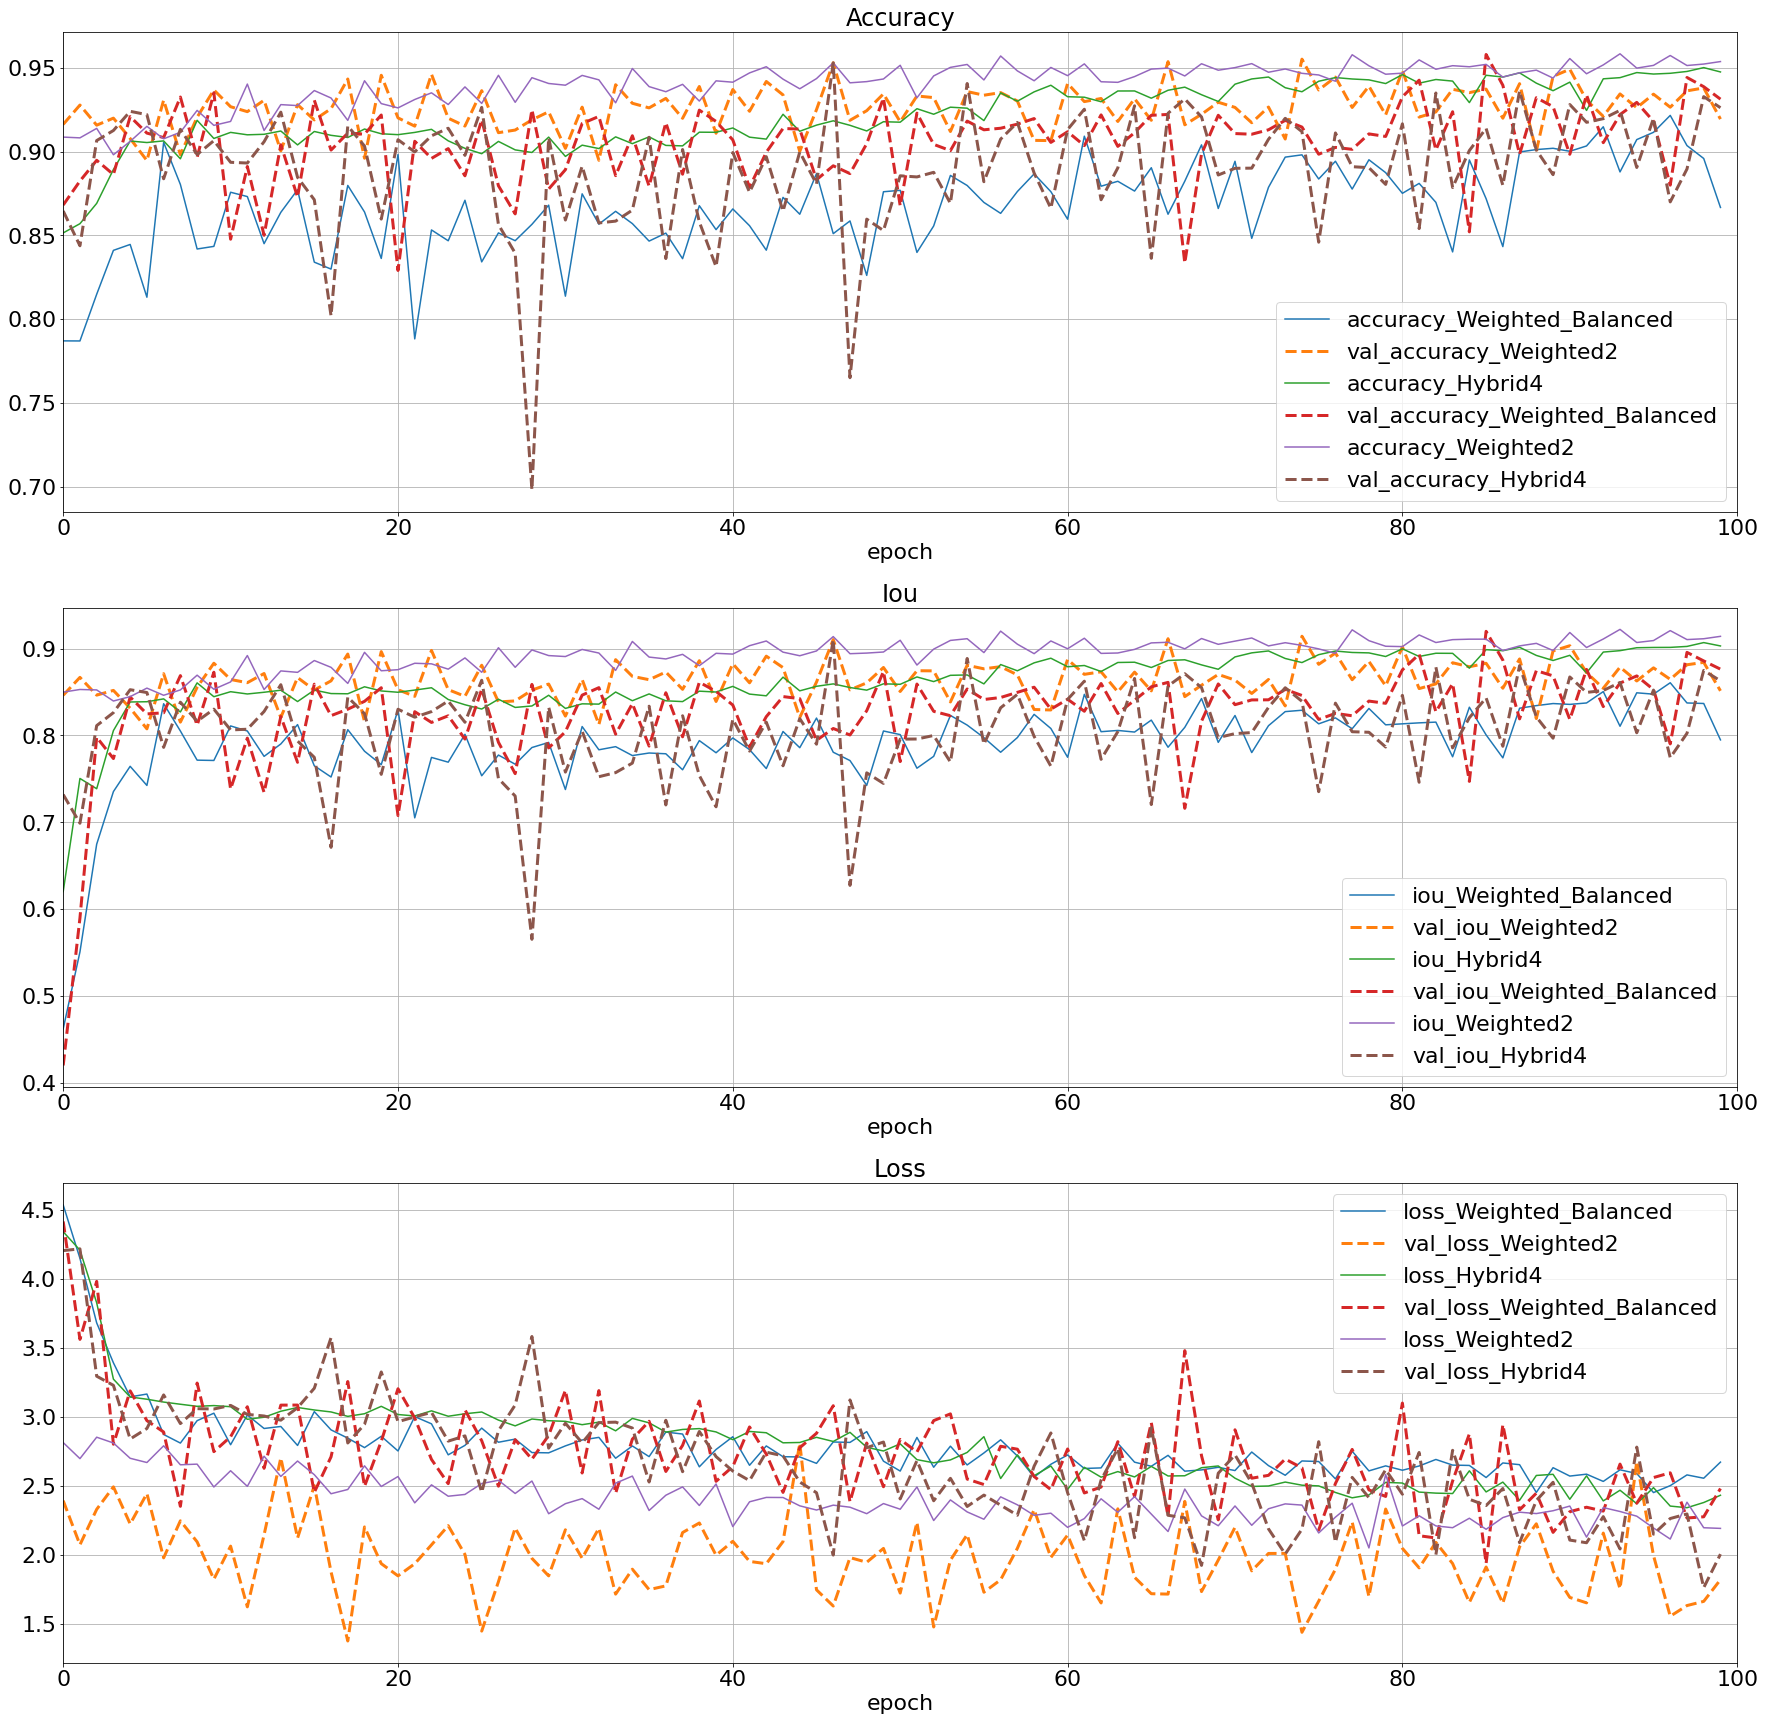

In [ ]:
import matplotlib as mpl
font = {'size'   : 22}

mpl.rc('font', **font)

plot_csv(dfs, names=["weighted_balanced","weighted2", "hybrid4"], metrics=["accuracy" , "iou", "loss"], savename=None)

In [ ]:
# fig, ax = plt.subplots(ncols=1,
#                        nrows=3,
#                        figsize=(10, 30))
# ax[0].set_title("Accuracy", fontsize=24)
# ax[1].set_title("Loss", fontsize=24)
# ax[2].set_title("IoU", fontsize=24)
# lp_acc = sns.lineplot(data=df_res[['accuracy', 'val_accuracy']], ax=ax[0])
# lp_loss = sns.lineplot(data=df_res[['loss', 'val_loss']], ax=ax[1])
# lp_iou = sns.lineplot(data=df_res[['iou', 'val_iou']], ax=ax[2])
# plt.savefig("Accuracy_loss_2.png")
# plt.show()

### CamVid dataset

In [ ]:
!wget https://github.com/alexgkendall/SegNet-Tutorial/blob/master/CamVid/testannot/0001TP_008790.png

--2021-04-15 08:40:50--  https://github.com/alexgkendall/SegNet-Tutorial/blob/master/CamVid/testannot/0001TP_008790.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘0001TP_008790.png’

0001TP_008790.png       [ <=>                ] 101.98K  --.-KB/s    in 0.05s   

2021-04-15 08:40:50 (1.85 MB/s) - ‘0001TP_008790.png’ saved [104424]



In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/content/0001TP_008790.png")
plt.imshow(img)
plt.show()

UnidentifiedImageError: ignored